In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

from sklearn.cluster import DBSCAN, KMeans

import seaborn as sns
sns.set()

from PIL import Image

import numpy as np
from numpy import mean
from numpy import isnan
from numpy import asarray

import os
import shutil, glob, os.path

from random import shuffle

from tqdm import tqdm

import math

import skimage
from skimage import data, io, color
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu 
from skimage.feature import canny 

from time import time

from random import randint

from scipy import stats


Using Gray Scale Segmentation .............
files in directory:  D:\Users\diego\Google Drive\AUNEB\ADocencia\EP\datasets\faces 
 ['branca01.jpg', 'branca02.jpg', 'branca03.jpg', 'casal_branco01.jpg', 'casal_moreno01.jpg', 'familia_branca01.jpg', 'familia_morena01.jpg', 'homem_branco01.jpg', 'homem_branco02.jpg', 'homem_branco03.jpg', 'homem_branco04.jpg', 'homem_moreno01.jpg', 'homem_moreno02.jpg', 'homem_moreno03.jpg', 'homem_moreno04.jpg', 'image_teste_segementacao_3_classes.png', 'jovem_branco01.jpg', 'jovem_branco02.jpg', 'jovem_branco03.jpg', 'jovem_branco04.jpg', 'jovem_loura01.jpg', 'jovem_moreno01.jpg', 'jovem_moreno02.jpg', 'jovem_moreno03.jpg', 'jovem_moreno04.jpg', 'morena01.jpg', 'morena02.jpg', 'morena03.jpg', 'mulher_morena01.jpg', 'mulher_morena02.jpg', 'mulher_morena03.jpg', 'senhora_branca01.jpg', 'senhora_branca02.jpg', 'senhora_branca03.jpg', 'senhora_branca04.jpg', 'senhora_morena01.jpg', 'senhora_morena02.jpg', 'senhora_morena03.jpg', 'senhora_morena04.jpg', 'senho

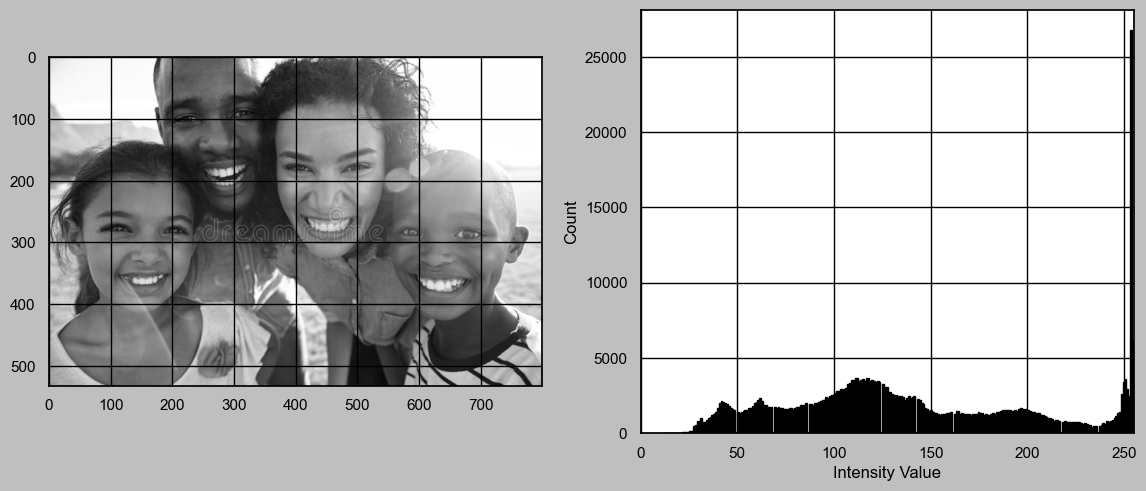


Imagem # 2 : homem_branco01.jpg
resolução da imagem:  (532, 426, 3)


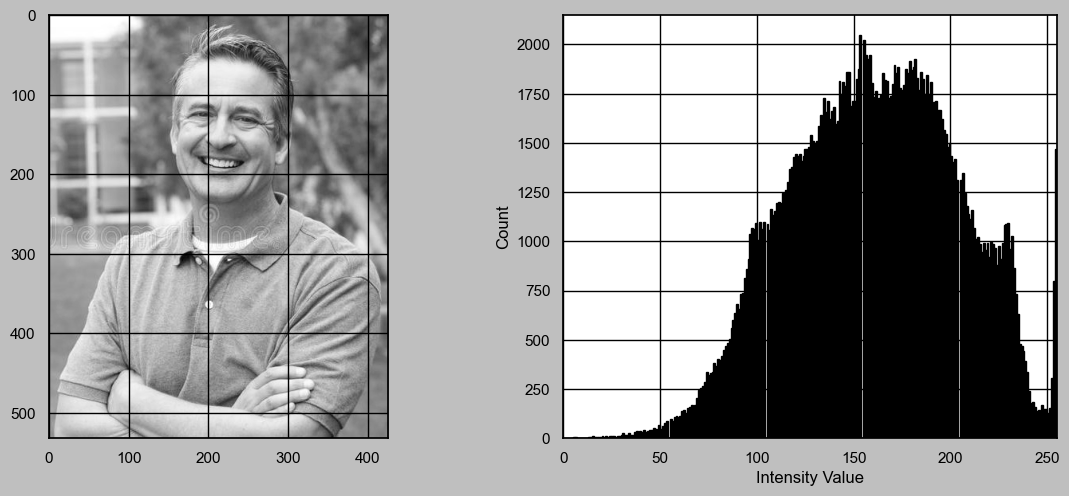


Imagem # 3 : homem_branco02.jpg
resolução da imagem:  (504, 652, 3)


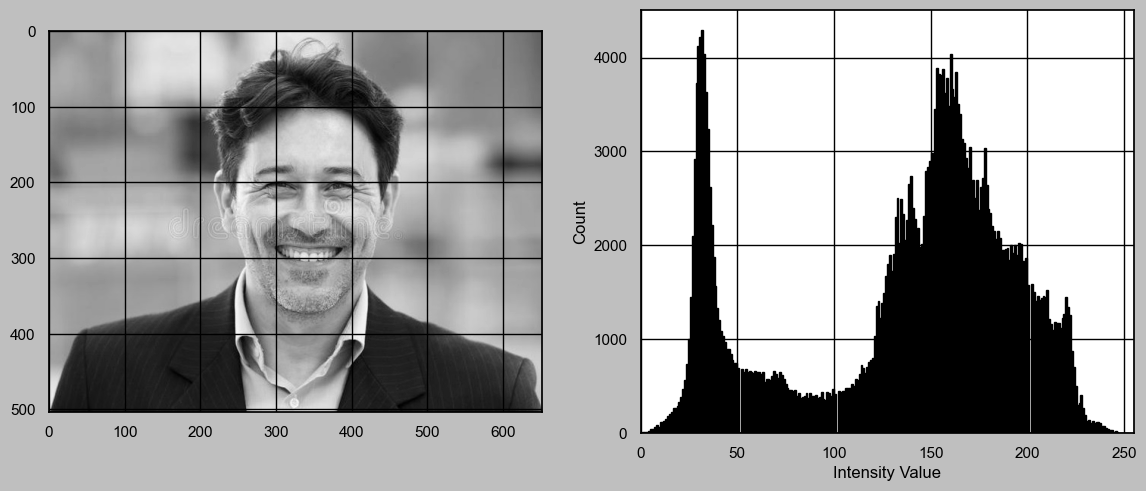


Imagem # 4 : homem_branco03.jpg
resolução da imagem:  (525, 602, 3)


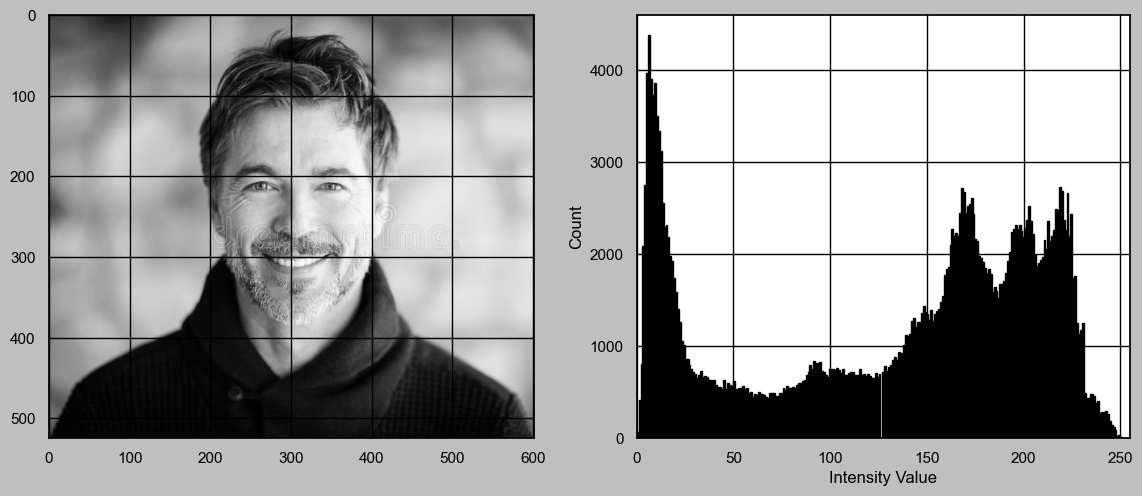


Imagem # 5 : homem_branco04.jpg
resolução da imagem:  (558, 404, 3)


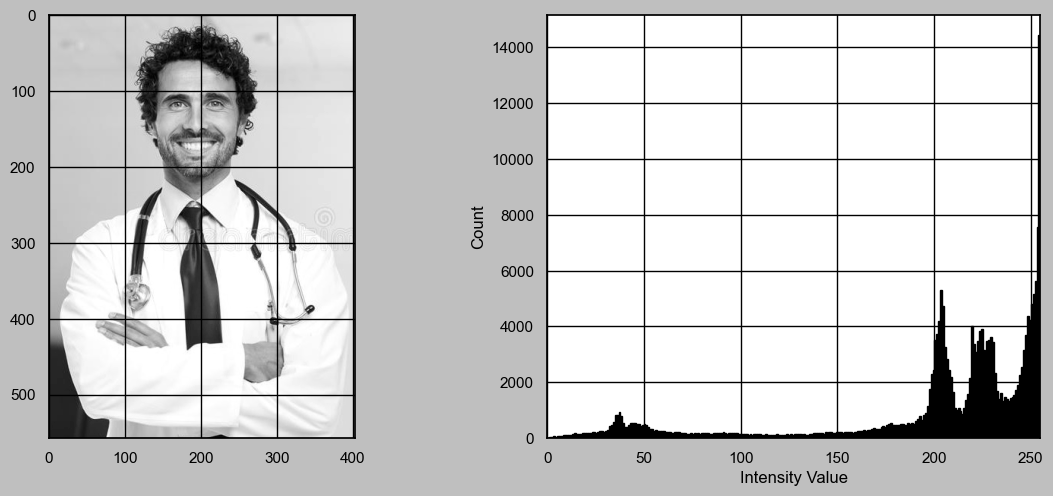


Imagem # 6 : homem_moreno01.jpg
resolução da imagem:  (534, 585, 3)


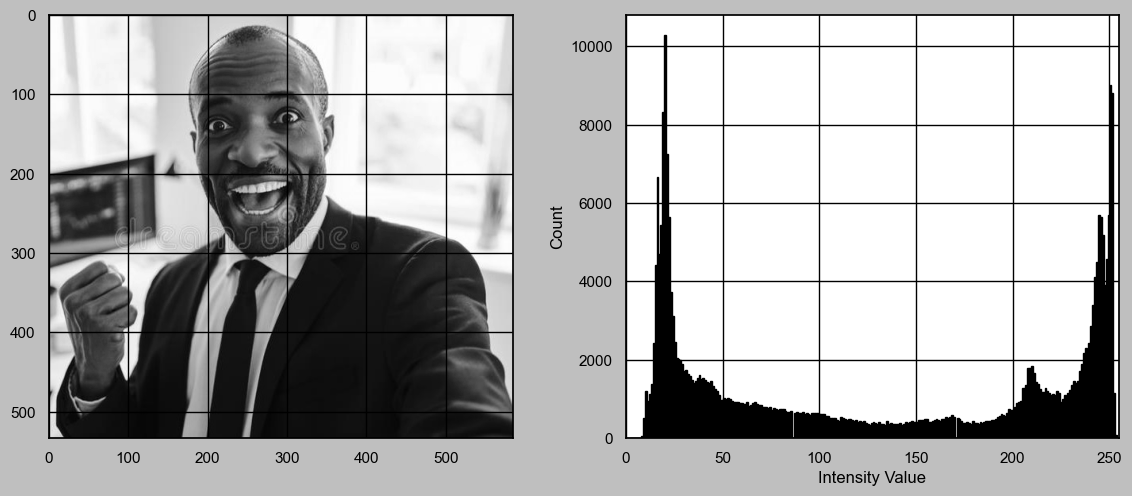

In [2]:
# PREPROCESSAMENTO DAS IMAGENS

as_gray = True #True  #False #True para trabalhar com imagens em escala de cinza

if as_gray:
    print("Using Gray Scale Segmentation .............")

#contagem e verificação das imagens
    
# INPUT_PATH = './faces'
INPUT_PATH = 'D:\\Users\\diego\\Google Drive\\AUNEB\\ADocencia\\EP\\datasets\\faces'


Files=os.listdir(INPUT_PATH)
print("files in directory: ",INPUT_PATH,"\n",os.listdir(INPUT_PATH))

Img=[]
img=[]
ncolors=[]
ResX=[]
ResY=[]
n=[]

nImg = 6
ini_img = 6
fim_img = 12
print("\nSelecionadas as imgs de", ini_img, "até", fim_img)
ctr = 1
for filename in Files[ini_img:fim_img]:
    
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'): # filtro formato da imagem
        try:
            img.append(io.imread(INPUT_PATH+"/"+filename))#, as_gray=as_gray)) # open the image file
            print("\nImagem #",ctr,':',filename)
            ctr+=1
            print("resolução da imagem: ",img[-1].shape)
            Img.append(img) # backup of original images
            
            ncolors.append(img[-1].shape[-1])
            ResX.append(img[-1].shape[0])
            ResY.append(img[-1].shape[1])
            n.append(ResX[-1]*ResY[-1])
            if not as_gray: 
                fig2, ax2 = plt.subplots(1,3, figsize=(20, 5.5))
                ax2[0].imshow(img[-1])
                if ncolors[-1]>1:
                    ax2[1].hist(img[-1].ravel(), bins = 64, color = 'orange', alpha = 0.5)
                    ax2[1].legend(['Total'])
                    ax2[2].hist(img[-1][:, :, 0].ravel(), bins = 64, color = 'Red', alpha = 0.5)
                    ax2[2].hist(img[-1][:, :, 1].ravel(), bins = 64, color = 'Green', alpha = 0.5)
                    ax2[2].hist(img[-1][:, :, 2].ravel(), bins = 64, color = 'Blue', alpha = 0.5)
                    ax2[2].legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
                    ax2[1].set_xlim(0, 255)
                    ax2[1].set_xlabel('Intensity Value')
                    ax2[1].set_ylabel('Count')
                    ax2[2].set_xlim(0, 255)
                    ax2[2].set_xlabel('Intensity Value')
                    ax2[2].set_ylabel('Count')
                plt.show()
            else: # to work with gray images
                plt.style.use('grayscale')
                if ncolors[-1]>1: # if it is RGB convert to grayscale
                    img[-1]=np.round(255*rgb2gray(img[-1]))
                ncolors[-1]=1
                fig2, ax2 = plt.subplots(1,2, figsize=(14, 5.5))
                ax2[0].imshow(img[-1])
                ax2[1].hist(img[-1].ravel(), bins = 256)   
                ax2[1].set_xlim(0, 255)
                ax2[1].set_xlabel('Intensity Value')
                ax2[1].set_ylabel('Count')
                plt.show()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)


In [3]:
# transforma imagens em vetores

Images=[]

for my_img in range(nImg):

    image=img[my_img]

    ch=[] # color channel vectors 

    for c in range(ncolors[my_img]):
        if ncolors[my_img]>1:
            ch.append(image[:,:,c].flatten()) 
        else:
            ch.append(image.flatten())
    print(ch)
    Images.append(np.array(ch))

[array([220., 220., 220., ..., 171., 178., 182.])]
[array([255., 255., 255., ..., 136., 138., 138.])]
[array([142., 142., 141., ...,  81.,  85., 110.])]
[array([67., 67., 68., ..., 80., 89., 99.])]
[array([204., 204., 204., ..., 219., 219., 219.])]
[array([253., 253., 252., ...,  41.,  40.,  38.])]


In [4]:
# geração de cores para representar cada cluster

my_color = []
my_color.append('#%06X' % 0)
my_color.append('#%06X' % 0xFFFFFF)
for i in range(20):
    my_color.append('#%06X' % randint(0, 0xFFFFFF))

In [5]:
#K-means

def kmeans(image, K, ncolors, n, maxiter):
    tempo_inicio = time()

    cc = np.zeros((ncolors,K), dtype=int) # vetor (matriz) de centroides

    classe = [-1 for i in range(n)] # inicializa o vetor de classificação de cada n da img. Todos com -1 inicialmente

     # DIEGO
    if ncolors > 1:
        cluster_size = []
        for c in range(ncolors):
            cluster_size.append(int((np.max(image[c])-np.min(image[c]))/K))
            cc[c,0] = int(cluster_size[-1]/2)
            for k in range(1,K):
                cc[c,k] = cc[c,k-1] + cluster_size[-1]
    else:    
        cluster_size = int((np.max(image)-np.min(image))/K)
        cc[0,0] = int(cluster_size/2)
        for k in range(1,K):
            cc[0,k] = cc[0,k-1] + cluster_size
#     # inicialização não-randomica dos centroides
#     min_cinza = min(np.array(image).ravel())
#     max_cinza = max(np.array(image).ravel())
#     S = (max_cinza - min_cinza) / K
#     bg = [0]*K
#     ed = [0]*K
#     for k in range(K):
#         if k == 0:
#             bg[k] = min_cinza
#             ed[k] = min_cinza + S
#         else:
#             bg[k] = ed[k-1] + 1
#             ed[k] = ed[k-1] + S
#         for c in range(ncolors):
#             cc[c,k] = int( (ed[k] + bg[k]) / 2 )

    INIT_TIME = time() - tempo_inicio

    tempo_inicio = time()

    #Processo iterativo
    iteracoes = 0
    while True:
        iteracoes += 1

        if iteracoes > maxiter:
            print("O número máximo de iterações (", maxiter,") foi excedido!")
            break

        mudanca = 0

        for i in range(n):    # varrendo os pixels
            d_minima = 1e30
            k_mais_prox = -1

            for k in range(K):   # varrendo clusters
                d = 0

                for c in range(ncolors):
                    d += np.abs(image[c][i] - cc[c][k])

                if d < d_minima:
                    d_minima = d
                    k_mais_prox = k

            if classe[i] != k_mais_prox:
                classe[i] = k_mais_prox # define a qual cluster aquele pixel pertence
                mudanca += 1
        #DIEGO
        print("ITERAÇÃO: ",iteracoes," MUDANÇAS:",mudanca)
        
        if mudanca == 0:
            ITER_TIME = (time() - tempo_inicio)/iteracoes #DIEGO
            print("TERMINEI - TEMPO MÉDIO POR ITERAÇÃO: ",ITER_TIME)
            break
        else:   # calculando novos centroides
            cluster_sz = [0 for k in range(K)]
            for i in range(n):
                for c in range(ncolors):
                    cc[c][classe[i]] += image[c][i]
                    cluster_sz[classe[i]] += 1

            for k in range(K):
                if cluster_sz[k]>0:
                    for c in range(ncolors):
                        cc[c][k] = int(cc[c][k]/cluster_sz[k])
                else: # caso um cluster fique sem nenhum ponto
                    print("Cluster", k,"sem pontos... Reinicializando o algortimo")
                    iteracoes = 0
                    for k in range(K):
                        p = randint(0,n-1) # pega um ponto qualquer
                        for c in range(ncolors):
                            cc[c,k] = image[c,p]

    return ITER_TIME, iteracoes, classe, cc

In [6]:
class Image_per_cluster:
    def __init__(self, n, k, t, var, iterations):
        self.n = n
        self.k = k
        self.t = t
        self.var = var
        self.iterations = iterations

    def __repr__(self):
        return str(self)



IMAGEM NÚMERO 1 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
ITERAÇÃO:  1  MUDANÇAS: 426400
ITERAÇÃO:  2  MUDANÇAS: 41143
ITERAÇÃO:  3  MUDANÇAS: 23593
ITERAÇÃO:  4  MUDANÇAS: 11742
ITERAÇÃO:  5  MUDANÇAS: 3946
ITERAÇÃO:  6  MUDANÇAS: 1224
ITERAÇÃO:  7  MUDANÇAS: 1252
ITERAÇÃO:  8  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.275922477245331
ITERAÇÃO:  1  MUDANÇAS: 426400
ITERAÇÃO:  2  MUDANÇAS: 41143
ITERAÇÃO:  3  MUDANÇAS: 23593
ITERAÇÃO:  4  MUDANÇAS: 11742
ITERAÇÃO:  5  MUDANÇAS: 3946
ITERAÇÃO:  6  MUDANÇAS: 1224
ITERAÇÃO:  7  MUDANÇAS: 1252
ITERAÇÃO:  8  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.4537587761878967
ITERAÇÃO:  1  MUDANÇAS: 426400
ITERAÇÃO:  2  MUDANÇAS: 41143
ITERAÇÃO:  3  MUDANÇAS: 23593
ITERAÇÃO:  4  MUDANÇAS: 11742
ITERAÇÃO:  5  MUDANÇAS: 3946
ITERAÇÃO:  6  MUDANÇAS: 1224
ITERAÇÃO:  7  MUDANÇAS: 1252
ITERAÇÃO:  8  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.579693704843521
ITERAÇÃO:  1  MUDANÇAS: 426400
ITERAÇÃO:  2

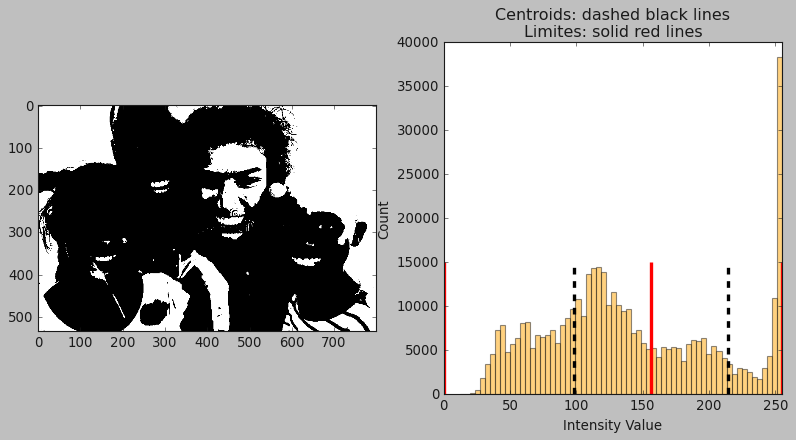

ITERAÇÃO:  1  MUDANÇAS: 426400
ITERAÇÃO:  2  MUDANÇAS: 21127
ITERAÇÃO:  3  MUDANÇAS: 10895
ITERAÇÃO:  4  MUDANÇAS: 8748
ITERAÇÃO:  5  MUDANÇAS: 3527
ITERAÇÃO:  6  MUDANÇAS: 3636
ITERAÇÃO:  7  MUDANÇAS: 3738
ITERAÇÃO:  8  MUDANÇAS: 2334
ITERAÇÃO:  9  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.6290486918555365
ITERAÇÃO:  1  MUDANÇAS: 426400
ITERAÇÃO:  2  MUDANÇAS: 21127
ITERAÇÃO:  3  MUDANÇAS: 10895
ITERAÇÃO:  4  MUDANÇAS: 8748
ITERAÇÃO:  5  MUDANÇAS: 3527
ITERAÇÃO:  6  MUDANÇAS: 3636
ITERAÇÃO:  7  MUDANÇAS: 3738
ITERAÇÃO:  8  MUDANÇAS: 2334
ITERAÇÃO:  9  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.485780053668552
ITERAÇÃO:  1  MUDANÇAS: 426400
ITERAÇÃO:  2  MUDANÇAS: 21127
ITERAÇÃO:  3  MUDANÇAS: 10895
ITERAÇÃO:  4  MUDANÇAS: 8748
ITERAÇÃO:  5  MUDANÇAS: 3527
ITERAÇÃO:  6  MUDANÇAS: 3636
ITERAÇÃO:  7  MUDANÇAS: 3738
ITERAÇÃO:  8  MUDANÇAS: 2334
ITERAÇÃO:  9  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.64724334081014
ITERAÇÃO:  1  MUDANÇAS: 426400
ITERAÇÃO:  2  M

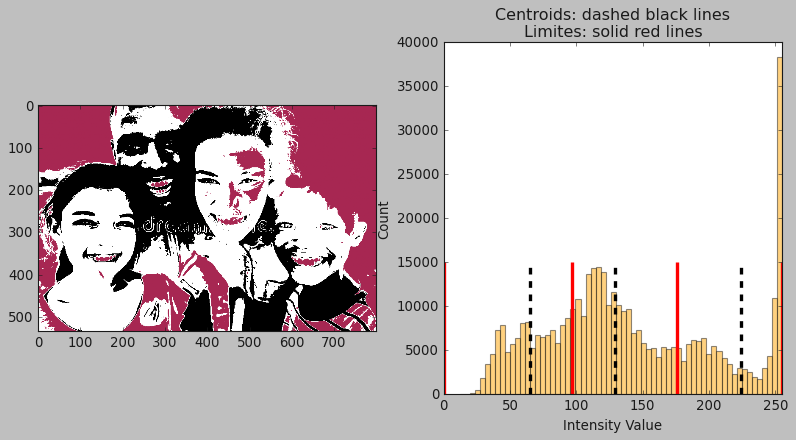

ITERAÇÃO:  1  MUDANÇAS: 426400
ITERAÇÃO:  2  MUDANÇAS: 29273
ITERAÇÃO:  3  MUDANÇAS: 21755
ITERAÇÃO:  4  MUDANÇAS: 16481
ITERAÇÃO:  5  MUDANÇAS: 15217
ITERAÇÃO:  6  MUDANÇAS: 14275
ITERAÇÃO:  7  MUDANÇAS: 11377
ITERAÇÃO:  8  MUDANÇAS: 12423
ITERAÇÃO:  9  MUDANÇAS: 11056
ITERAÇÃO:  10  MUDANÇAS: 9541
ITERAÇÃO:  11  MUDANÇAS: 5046
ITERAÇÃO:  12  MUDANÇAS: 8076
ITERAÇÃO:  13  MUDANÇAS: 6551
ITERAÇÃO:  14  MUDANÇAS: 5113
ITERAÇÃO:  15  MUDANÇAS: 4713
ITERAÇÃO:  16  MUDANÇAS: 2657
ITERAÇÃO:  17  MUDANÇAS: 977
ITERAÇÃO:  18  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  4.462744461165534
ITERAÇÃO:  1  MUDANÇAS: 426400
ITERAÇÃO:  2  MUDANÇAS: 29273
ITERAÇÃO:  3  MUDANÇAS: 21755
ITERAÇÃO:  4  MUDANÇAS: 16481
ITERAÇÃO:  5  MUDANÇAS: 15217
ITERAÇÃO:  6  MUDANÇAS: 14275
ITERAÇÃO:  7  MUDANÇAS: 11377
ITERAÇÃO:  8  MUDANÇAS: 12423
ITERAÇÃO:  9  MUDANÇAS: 11056
ITERAÇÃO:  10  MUDANÇAS: 9541
ITERAÇÃO:  11  MUDANÇAS: 5046
ITERAÇÃO:  12  MUDANÇAS: 8076
ITERAÇÃO:  13  MUDANÇAS: 6551
ITERAÇÃO:  14  M

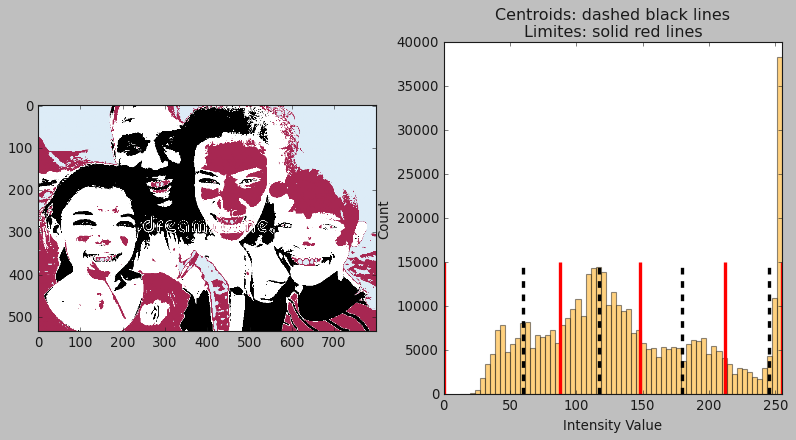



IMAGEM NÚMERO 2 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
ITERAÇÃO:  1  MUDANÇAS: 226632
ITERAÇÃO:  2  MUDANÇAS: 23628
ITERAÇÃO:  3  MUDANÇAS: 13911
ITERAÇÃO:  4  MUDANÇAS: 8796
ITERAÇÃO:  5  MUDANÇAS: 5948
ITERAÇÃO:  6  MUDANÇAS: 1948
ITERAÇÃO:  7  MUDANÇAS: 1925
ITERAÇÃO:  8  MUDANÇAS: 1945
ITERAÇÃO:  9  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4010798401302762
ITERAÇÃO:  1  MUDANÇAS: 226632
ITERAÇÃO:  2  MUDANÇAS: 23628
ITERAÇÃO:  3  MUDANÇAS: 13911
ITERAÇÃO:  4  MUDANÇAS: 8796
ITERAÇÃO:  5  MUDANÇAS: 5948
ITERAÇÃO:  6  MUDANÇAS: 1948
ITERAÇÃO:  7  MUDANÇAS: 1925
ITERAÇÃO:  8  MUDANÇAS: 1945
ITERAÇÃO:  9  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.364184300104777
ITERAÇÃO:  1  MUDANÇAS: 226632
ITERAÇÃO:  2  MUDANÇAS: 23628
ITERAÇÃO:  3  MUDANÇAS: 13911
ITERAÇÃO:  4  MUDANÇAS: 8796
ITERAÇÃO:  5  MUDANÇAS: 5948
ITERAÇÃO:  6  MUDANÇAS: 1948
ITERAÇÃO:  7  MUDANÇAS: 1925
ITERAÇÃO:  8  MUDANÇAS: 1945
ITERAÇÃO:  9  MUDANÇAS: 0
TERMINEI - TEMP

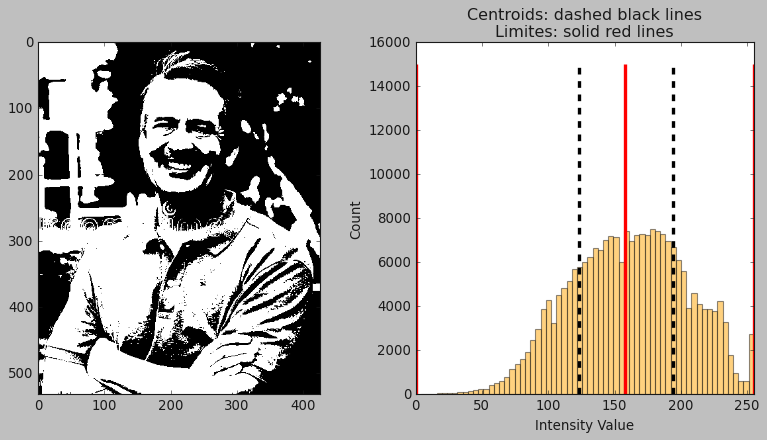

ITERAÇÃO:  1  MUDANÇAS: 226632
ITERAÇÃO:  2  MUDANÇAS: 14126
ITERAÇÃO:  3  MUDANÇAS: 13479
ITERAÇÃO:  4  MUDANÇAS: 12472
ITERAÇÃO:  5  MUDANÇAS: 9001
ITERAÇÃO:  6  MUDANÇAS: 8046
ITERAÇÃO:  7  MUDANÇAS: 6398
ITERAÇÃO:  8  MUDANÇAS: 6573
ITERAÇÃO:  9  MUDANÇAS: 3321
ITERAÇÃO:  10  MUDANÇAS: 3396
ITERAÇÃO:  11  MUDANÇAS: 3414
ITERAÇÃO:  12  MUDANÇAS: 3394
ITERAÇÃO:  13  MUDANÇAS: 3423
ITERAÇÃO:  14  MUDANÇAS: 1511
ITERAÇÃO:  15  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.125725571314494
ITERAÇÃO:  1  MUDANÇAS: 226632
ITERAÇÃO:  2  MUDANÇAS: 14126
ITERAÇÃO:  3  MUDANÇAS: 13479
ITERAÇÃO:  4  MUDANÇAS: 12472
ITERAÇÃO:  5  MUDANÇAS: 9001
ITERAÇÃO:  6  MUDANÇAS: 8046
ITERAÇÃO:  7  MUDANÇAS: 6398
ITERAÇÃO:  8  MUDANÇAS: 6573
ITERAÇÃO:  9  MUDANÇAS: 3321
ITERAÇÃO:  10  MUDANÇAS: 3396
ITERAÇÃO:  11  MUDANÇAS: 3414
ITERAÇÃO:  12  MUDANÇAS: 3394
ITERAÇÃO:  13  MUDANÇAS: 3423
ITERAÇÃO:  14  MUDANÇAS: 1511
ITERAÇÃO:  15  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.8686000506083171
I

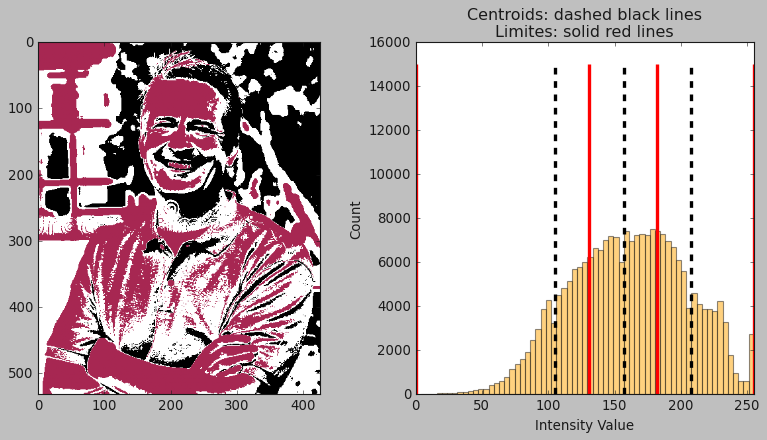

ITERAÇÃO:  1  MUDANÇAS: 226632
ITERAÇÃO:  2  MUDANÇAS: 16098
ITERAÇÃO:  3  MUDANÇAS: 8295
ITERAÇÃO:  4  MUDANÇAS: 8546
ITERAÇÃO:  5  MUDANÇAS: 8286
ITERAÇÃO:  6  MUDANÇAS: 8161
ITERAÇÃO:  7  MUDANÇAS: 8267
ITERAÇÃO:  8  MUDANÇAS: 7334
ITERAÇÃO:  9  MUDANÇAS: 7585
ITERAÇÃO:  10  MUDANÇAS: 7620
ITERAÇÃO:  11  MUDANÇAS: 4804
ITERAÇÃO:  12  MUDANÇAS: 4510
ITERAÇÃO:  13  MUDANÇAS: 4614
ITERAÇÃO:  14  MUDANÇAS: 4625
ITERAÇÃO:  15  MUDANÇAS: 4690
ITERAÇÃO:  16  MUDANÇAS: 1874
ITERAÇÃO:  17  MUDANÇAS: 1244
ITERAÇÃO:  18  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.4402773247824774
ITERAÇÃO:  1  MUDANÇAS: 226632
ITERAÇÃO:  2  MUDANÇAS: 16098
ITERAÇÃO:  3  MUDANÇAS: 8295
ITERAÇÃO:  4  MUDANÇAS: 8546
ITERAÇÃO:  5  MUDANÇAS: 8286
ITERAÇÃO:  6  MUDANÇAS: 8161
ITERAÇÃO:  7  MUDANÇAS: 8267
ITERAÇÃO:  8  MUDANÇAS: 7334
ITERAÇÃO:  9  MUDANÇAS: 7585
ITERAÇÃO:  10  MUDANÇAS: 7620
ITERAÇÃO:  11  MUDANÇAS: 4804
ITERAÇÃO:  12  MUDANÇAS: 4510
ITERAÇÃO:  13  MUDANÇAS: 4614
ITERAÇÃO:  14  MUDANÇAS: 462

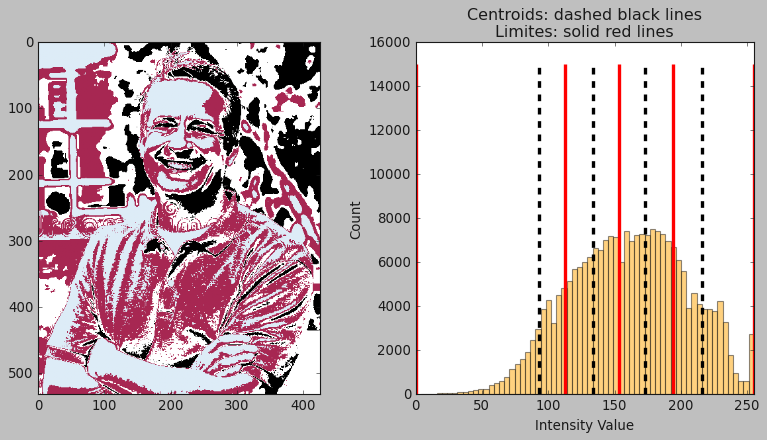



IMAGEM NÚMERO 3 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
ITERAÇÃO:  1  MUDANÇAS: 328608
ITERAÇÃO:  2  MUDANÇAS: 10762
ITERAÇÃO:  3  MUDANÇAS: 2173
ITERAÇÃO:  4  MUDANÇAS: 486
ITERAÇÃO:  5  MUDANÇAS: 476
ITERAÇÃO:  6  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.0306445757548013
ITERAÇÃO:  1  MUDANÇAS: 328608
ITERAÇÃO:  2  MUDANÇAS: 10762
ITERAÇÃO:  3  MUDANÇAS: 2173
ITERAÇÃO:  4  MUDANÇAS: 486
ITERAÇÃO:  5  MUDANÇAS: 476
ITERAÇÃO:  6  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.1003620624542236
ITERAÇÃO:  1  MUDANÇAS: 328608
ITERAÇÃO:  2  MUDANÇAS: 10762
ITERAÇÃO:  3  MUDANÇAS: 2173
ITERAÇÃO:  4  MUDANÇAS: 486
ITERAÇÃO:  5  MUDANÇAS: 476
ITERAÇÃO:  6  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.125731190045675
ITERAÇÃO:  1  MUDANÇAS: 328608
ITERAÇÃO:  2  MUDANÇAS: 10762
ITERAÇÃO:  3  MUDANÇAS: 2173
ITERAÇÃO:  4  MUDANÇAS: 486
ITERAÇÃO:  5  MUDANÇAS: 476
ITERAÇÃO:  6  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.5452082554499307

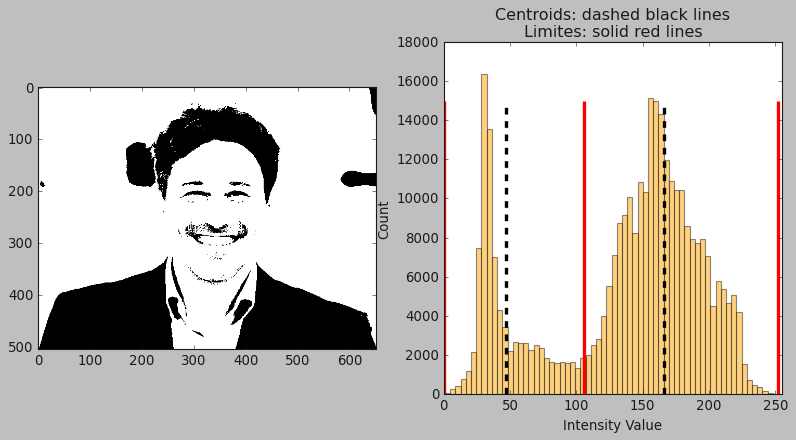

ITERAÇÃO:  1  MUDANÇAS: 328608
ITERAÇÃO:  2  MUDANÇAS: 3186
ITERAÇÃO:  3  MUDANÇAS: 3914
ITERAÇÃO:  4  MUDANÇAS: 3483
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.286634111404419
ITERAÇÃO:  1  MUDANÇAS: 328608
ITERAÇÃO:  2  MUDANÇAS: 3186
ITERAÇÃO:  3  MUDANÇAS: 3914
ITERAÇÃO:  4  MUDANÇAS: 3483
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.9331421852111816
ITERAÇÃO:  1  MUDANÇAS: 328608
ITERAÇÃO:  2  MUDANÇAS: 3186
ITERAÇÃO:  3  MUDANÇAS: 3914
ITERAÇÃO:  4  MUDANÇAS: 3483
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.8811100006103514
ITERAÇÃO:  1  MUDANÇAS: 328608
ITERAÇÃO:  2  MUDANÇAS: 3186
ITERAÇÃO:  3  MUDANÇAS: 3914
ITERAÇÃO:  4  MUDANÇAS: 3483
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.7835227966308596
ITERAÇÃO:  1  MUDANÇAS: 328608
ITERAÇÃO:  2  MUDANÇAS: 3186
ITERAÇÃO:  3  MUDANÇAS: 3914
ITERAÇÃO:  4  MUDANÇAS: 3483
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.0627198219299

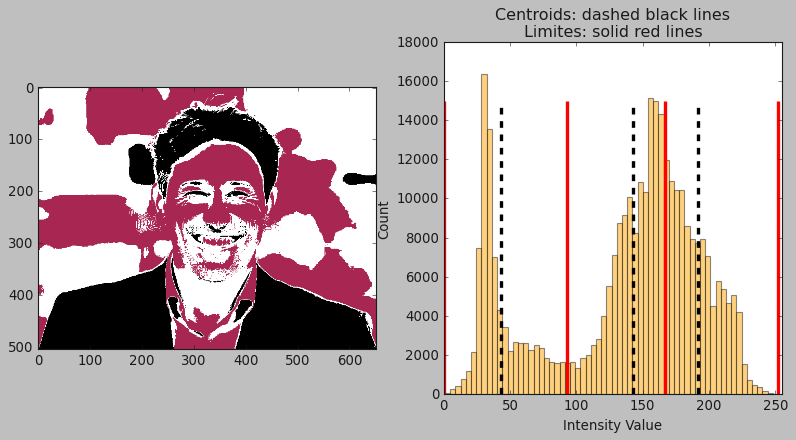

ITERAÇÃO:  1  MUDANÇAS: 328608
ITERAÇÃO:  2  MUDANÇAS: 17657
ITERAÇÃO:  3  MUDANÇAS: 11491
ITERAÇÃO:  4  MUDANÇAS: 5816
ITERAÇÃO:  5  MUDANÇAS: 2483
ITERAÇÃO:  6  MUDANÇAS: 2371
ITERAÇÃO:  7  MUDANÇAS: 2528
ITERAÇÃO:  8  MUDANÇAS: 2872
ITERAÇÃO:  9  MUDANÇAS: 3029
ITERAÇÃO:  10  MUDANÇAS: 7725
ITERAÇÃO:  11  MUDANÇAS: 2793
ITERAÇÃO:  12  MUDANÇAS: 2517
ITERAÇÃO:  13  MUDANÇAS: 5755
ITERAÇÃO:  14  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  4.2726776940482
ITERAÇÃO:  1  MUDANÇAS: 328608
ITERAÇÃO:  2  MUDANÇAS: 17657
ITERAÇÃO:  3  MUDANÇAS: 11491
ITERAÇÃO:  4  MUDANÇAS: 5816
ITERAÇÃO:  5  MUDANÇAS: 2483
ITERAÇÃO:  6  MUDANÇAS: 2371
ITERAÇÃO:  7  MUDANÇAS: 2528
ITERAÇÃO:  8  MUDANÇAS: 2872
ITERAÇÃO:  9  MUDANÇAS: 3029
ITERAÇÃO:  10  MUDANÇAS: 7725
ITERAÇÃO:  11  MUDANÇAS: 2793
ITERAÇÃO:  12  MUDANÇAS: 2517
ITERAÇÃO:  13  MUDANÇAS: 5755
ITERAÇÃO:  14  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.6627757038388933
ITERAÇÃO:  1  MUDANÇAS: 328608
ITERAÇÃO:  2  MUDANÇAS: 17657
ITER

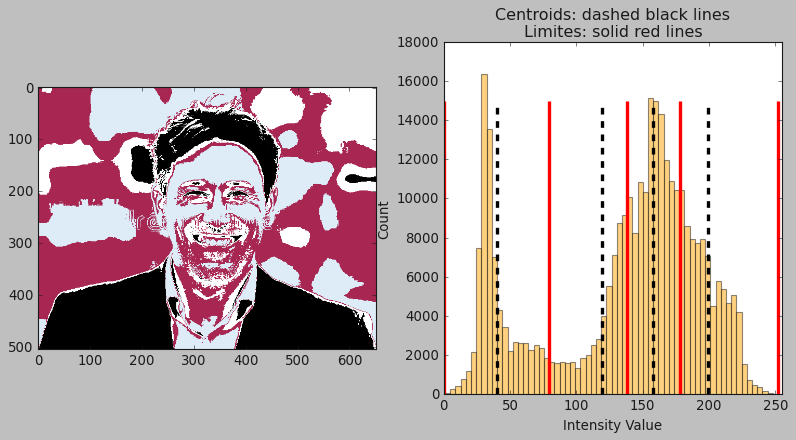



IMAGEM NÚMERO 4 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 7564
ITERAÇÃO:  3  MUDANÇAS: 2059
ITERAÇÃO:  4  MUDANÇAS: 719
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.8123647212982177
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 7564
ITERAÇÃO:  3  MUDANÇAS: 2059
ITERAÇÃO:  4  MUDANÇAS: 719
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.8302619934082032
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 7564
ITERAÇÃO:  3  MUDANÇAS: 2059
ITERAÇÃO:  4  MUDANÇAS: 719
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.8252082347869873
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 7564
ITERAÇÃO:  3  MUDANÇAS: 2059
ITERAÇÃO:  4  MUDANÇAS: 719
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.9736918926239013
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 7564
ITERAÇÃO:  3  MUDANÇAS: 2059
ITERAÇÃO:  4  MUDANÇAS: 7

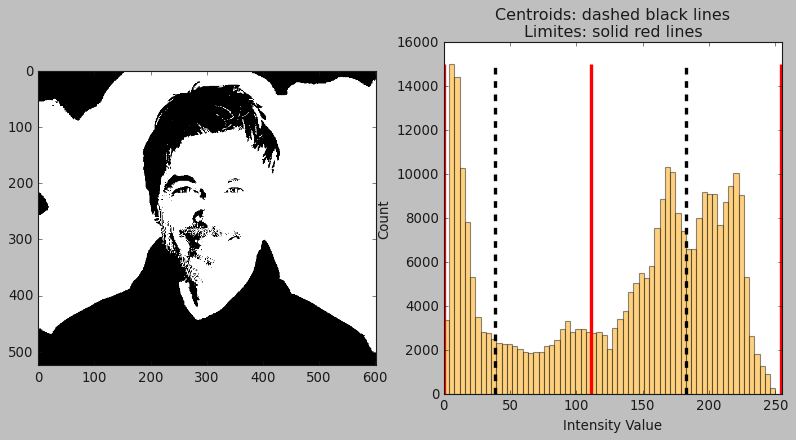

ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 2270
ITERAÇÃO:  3  MUDANÇAS: 3267
ITERAÇÃO:  4  MUDANÇAS: 2996
ITERAÇÃO:  5  MUDANÇAS: 2761
ITERAÇÃO:  6  MUDANÇAS: 2233
ITERAÇÃO:  7  MUDANÇAS: 2719
ITERAÇÃO:  8  MUDANÇAS: 540
ITERAÇÃO:  9  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.5586863623725042
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 2270
ITERAÇÃO:  3  MUDANÇAS: 3267
ITERAÇÃO:  4  MUDANÇAS: 2996
ITERAÇÃO:  5  MUDANÇAS: 2761
ITERAÇÃO:  6  MUDANÇAS: 2233
ITERAÇÃO:  7  MUDANÇAS: 2719
ITERAÇÃO:  8  MUDANÇAS: 540
ITERAÇÃO:  9  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.5939470132191977
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 2270
ITERAÇÃO:  3  MUDANÇAS: 3267
ITERAÇÃO:  4  MUDANÇAS: 2996
ITERAÇÃO:  5  MUDANÇAS: 2761
ITERAÇÃO:  6  MUDANÇAS: 2233
ITERAÇÃO:  7  MUDANÇAS: 2719
ITERAÇÃO:  8  MUDANÇAS: 540
ITERAÇÃO:  9  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.533018112182617
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS

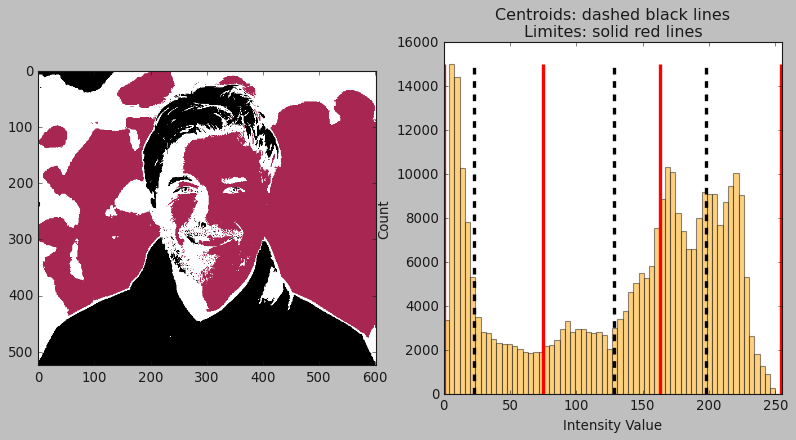

ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 8041
ITERAÇÃO:  3  MUDANÇAS: 489
ITERAÇÃO:  4  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.1242454051971436
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 8041
ITERAÇÃO:  3  MUDANÇAS: 489
ITERAÇÃO:  4  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.1108110547065735
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 8041
ITERAÇÃO:  3  MUDANÇAS: 489
ITERAÇÃO:  4  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.1181573271751404
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 8041
ITERAÇÃO:  3  MUDANÇAS: 489
ITERAÇÃO:  4  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.1516372561454773
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 8041
ITERAÇÃO:  3  MUDANÇAS: 489
ITERAÇÃO:  4  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.203878402709961
ITERAÇÃO:  1  MUDANÇAS: 316050
ITERAÇÃO:  2  MUDANÇAS: 8041
ITERAÇÃO:  3  MUDANÇAS: 489
ITERAÇÃO:  4  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERA

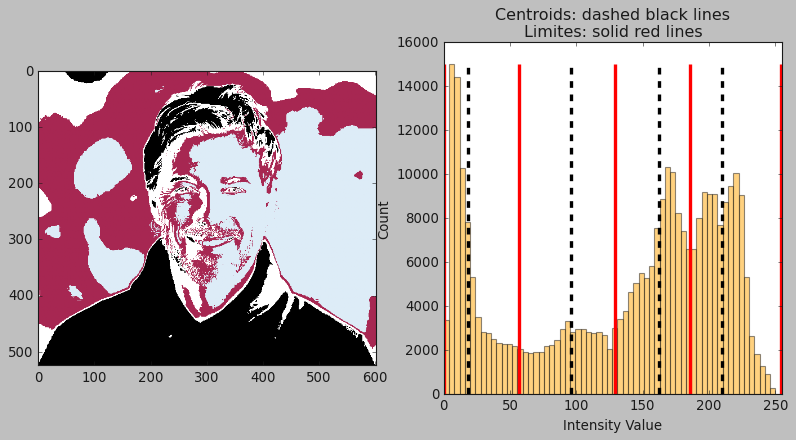



IMAGEM NÚMERO 5 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
ITERAÇÃO:  1  MUDANÇAS: 225432
ITERAÇÃO:  2  MUDANÇAS: 1863
ITERAÇÃO:  3  MUDANÇAS: 560
ITERAÇÃO:  4  MUDANÇAS: 138
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.2767730236053467
ITERAÇÃO:  1  MUDANÇAS: 225432
ITERAÇÃO:  2  MUDANÇAS: 1863
ITERAÇÃO:  3  MUDANÇAS: 560
ITERAÇÃO:  4  MUDANÇAS: 138
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.2969548225402832
ITERAÇÃO:  1  MUDANÇAS: 225432
ITERAÇÃO:  2  MUDANÇAS: 1863
ITERAÇÃO:  3  MUDANÇAS: 560
ITERAÇÃO:  4  MUDANÇAS: 138
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.2752718448638916
ITERAÇÃO:  1  MUDANÇAS: 225432
ITERAÇÃO:  2  MUDANÇAS: 1863
ITERAÇÃO:  3  MUDANÇAS: 560
ITERAÇÃO:  4  MUDANÇAS: 138
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.3037200450897217
ITERAÇÃO:  1  MUDANÇAS: 225432
ITERAÇÃO:  2  MUDANÇAS: 1863
ITERAÇÃO:  3  MUDANÇAS: 560
ITERAÇÃO:  4  MUDANÇAS: 138
IT

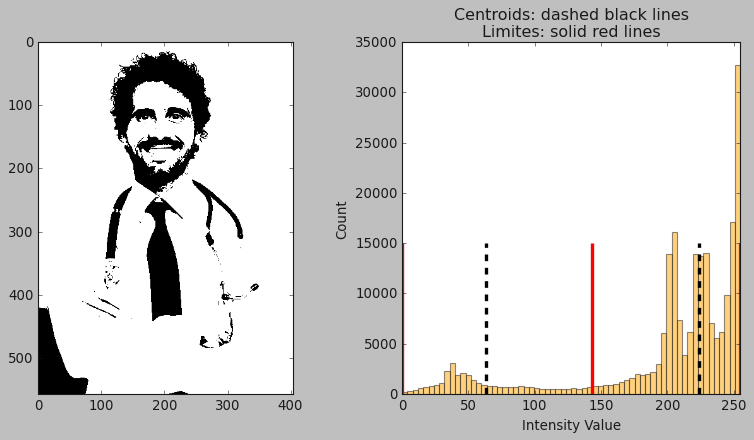

ITERAÇÃO:  1  MUDANÇAS: 225432
ITERAÇÃO:  2  MUDANÇAS: 4275
ITERAÇÃO:  3  MUDANÇAS: 4043
ITERAÇÃO:  4  MUDANÇAS: 2946
ITERAÇÃO:  5  MUDANÇAS: 2109
ITERAÇÃO:  6  MUDANÇAS: 2577
ITERAÇÃO:  7  MUDANÇAS: 2032
ITERAÇÃO:  8  MUDANÇAS: 1421
ITERAÇÃO:  9  MUDANÇAS: 4173
ITERAÇÃO:  10  MUDANÇAS: 6331
ITERAÇÃO:  11  MUDANÇAS: 13489
ITERAÇÃO:  12  MUDANÇAS: 16120
ITERAÇÃO:  13  MUDANÇAS: 6116
ITERAÇÃO:  14  MUDANÇAS: 1145
ITERAÇÃO:  15  MUDANÇAS: 1098
ITERAÇÃO:  16  MUDANÇAS: 118
ITERAÇÃO:  17  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.7927015949698055
ITERAÇÃO:  1  MUDANÇAS: 225432
ITERAÇÃO:  2  MUDANÇAS: 4275
ITERAÇÃO:  3  MUDANÇAS: 4043
ITERAÇÃO:  4  MUDANÇAS: 2946
ITERAÇÃO:  5  MUDANÇAS: 2109
ITERAÇÃO:  6  MUDANÇAS: 2577
ITERAÇÃO:  7  MUDANÇAS: 2032
ITERAÇÃO:  8  MUDANÇAS: 1421
ITERAÇÃO:  9  MUDANÇAS: 4173
ITERAÇÃO:  10  MUDANÇAS: 6331
ITERAÇÃO:  11  MUDANÇAS: 13489
ITERAÇÃO:  12  MUDANÇAS: 16120
ITERAÇÃO:  13  MUDANÇAS: 6116
ITERAÇÃO:  14  MUDANÇAS: 1145
ITERAÇÃO:  15  MUDANÇAS: 10

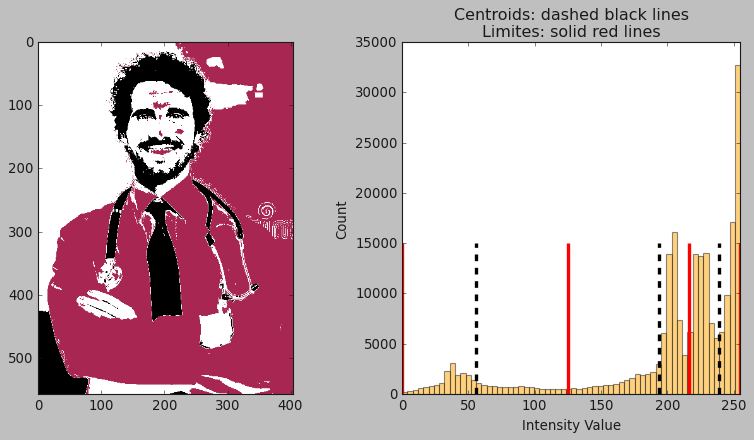

ITERAÇÃO:  1  MUDANÇAS: 225432
ITERAÇÃO:  2  MUDANÇAS: 6232
ITERAÇÃO:  3  MUDANÇAS: 8531
ITERAÇÃO:  4  MUDANÇAS: 22757
ITERAÇÃO:  5  MUDANÇAS: 16146
ITERAÇÃO:  6  MUDANÇAS: 5566
ITERAÇÃO:  7  MUDANÇAS: 4092
ITERAÇÃO:  8  MUDANÇAS: 983
ITERAÇÃO:  9  MUDANÇAS: 2892
ITERAÇÃO:  10  MUDANÇAS: 4421
ITERAÇÃO:  11  MUDANÇAS: 640
ITERAÇÃO:  12  MUDANÇAS: 596
ITERAÇÃO:  13  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.281567830305833
ITERAÇÃO:  1  MUDANÇAS: 225432
ITERAÇÃO:  2  MUDANÇAS: 6232
ITERAÇÃO:  3  MUDANÇAS: 8531
ITERAÇÃO:  4  MUDANÇAS: 22757
ITERAÇÃO:  5  MUDANÇAS: 16146
ITERAÇÃO:  6  MUDANÇAS: 5566
ITERAÇÃO:  7  MUDANÇAS: 4092
ITERAÇÃO:  8  MUDANÇAS: 983
ITERAÇÃO:  9  MUDANÇAS: 2892
ITERAÇÃO:  10  MUDANÇAS: 4421
ITERAÇÃO:  11  MUDANÇAS: 640
ITERAÇÃO:  12  MUDANÇAS: 596
ITERAÇÃO:  13  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.2711613728449893
ITERAÇÃO:  1  MUDANÇAS: 225432
ITERAÇÃO:  2  MUDANÇAS: 6232
ITERAÇÃO:  3  MUDANÇAS: 8531
ITERAÇÃO:  4  MUDANÇAS: 22757
ITERAÇÃO: 

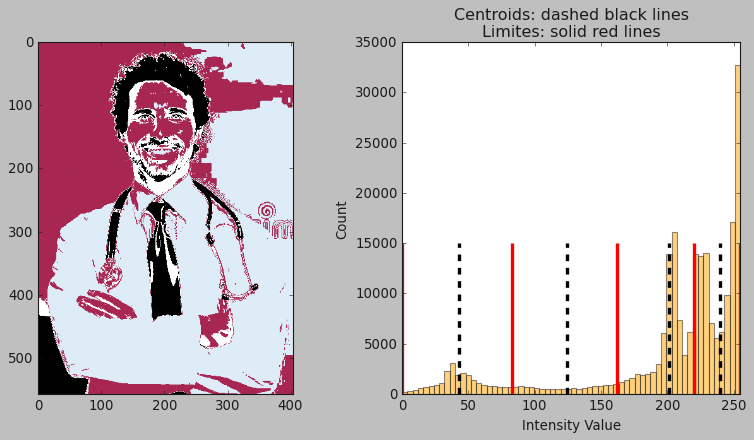



IMAGEM NÚMERO 6 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 1942
ITERAÇÃO:  3  MUDANÇAS: 363
ITERAÇÃO:  4  MUDANÇAS: 366
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.0559707164764403
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 1942
ITERAÇÃO:  3  MUDANÇAS: 363
ITERAÇÃO:  4  MUDANÇAS: 366
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.955183458328247
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 1942
ITERAÇÃO:  3  MUDANÇAS: 363
ITERAÇÃO:  4  MUDANÇAS: 366
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.896143865585327
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 1942
ITERAÇÃO:  3  MUDANÇAS: 363
ITERAÇÃO:  4  MUDANÇAS: 366
ITERAÇÃO:  5  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.853690767288208
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 1942
ITERAÇÃO:  3  MUDANÇAS: 363
ITERAÇÃO:  4  MUDANÇAS: 366
ITERA

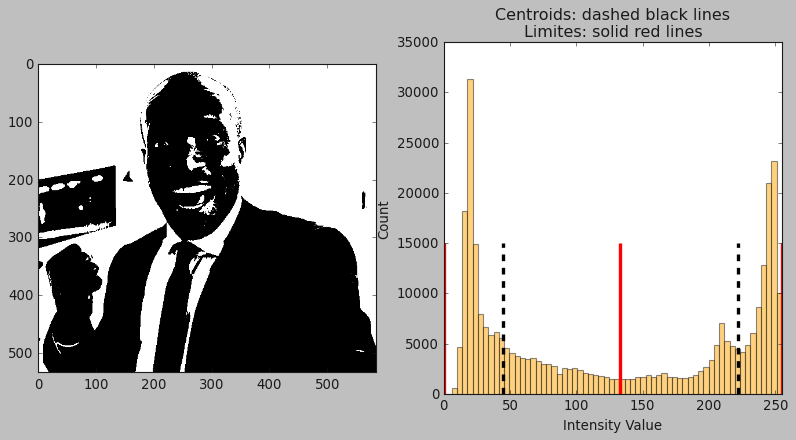

ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 8045
ITERAÇÃO:  3  MUDANÇAS: 1139
ITERAÇÃO:  4  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.6650540232658386
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 8045
ITERAÇÃO:  3  MUDANÇAS: 1139
ITERAÇÃO:  4  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.4201358556747437
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 8045
ITERAÇÃO:  3  MUDANÇAS: 1139
ITERAÇÃO:  4  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.5299254655838013
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 8045
ITERAÇÃO:  3  MUDANÇAS: 1139
ITERAÇÃO:  4  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.6187833547592163
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 8045
ITERAÇÃO:  3  MUDANÇAS: 1139
ITERAÇÃO:  4  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.5885428190231323
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 8045
ITERAÇÃO:  3  MUDANÇAS: 1139
ITERAÇÃO:  4  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO PO

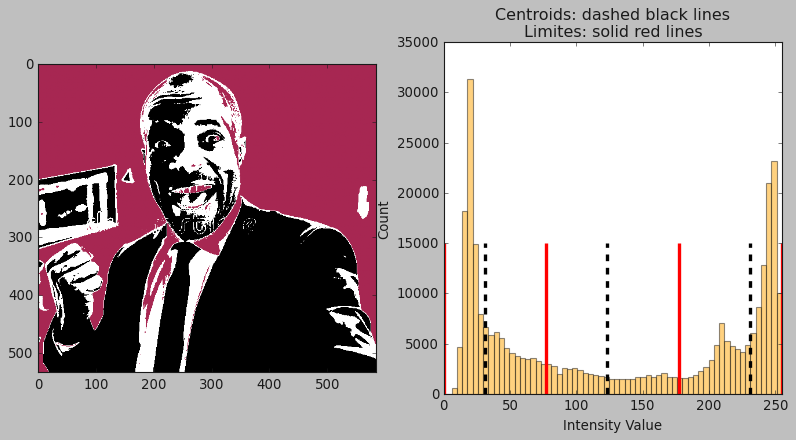

ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 8051
ITERAÇÃO:  3  MUDANÇAS: 3043
ITERAÇÃO:  4  MUDANÇAS: 1679
ITERAÇÃO:  5  MUDANÇAS: 1125
ITERAÇÃO:  6  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.2196144660313926
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 8051
ITERAÇÃO:  3  MUDANÇAS: 3043
ITERAÇÃO:  4  MUDANÇAS: 1679
ITERAÇÃO:  5  MUDANÇAS: 1125
ITERAÇÃO:  6  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.1876144409179688
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 8051
ITERAÇÃO:  3  MUDANÇAS: 3043
ITERAÇÃO:  4  MUDANÇAS: 1679
ITERAÇÃO:  5  MUDANÇAS: 1125
ITERAÇÃO:  6  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.53337562084198
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 8051
ITERAÇÃO:  3  MUDANÇAS: 3043
ITERAÇÃO:  4  MUDANÇAS: 1679
ITERAÇÃO:  5  MUDANÇAS: 1125
ITERAÇÃO:  6  MUDANÇAS: 0
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  3.5005205869674683
ITERAÇÃO:  1  MUDANÇAS: 312390
ITERAÇÃO:  2  MUDANÇAS: 8051
ITERAÇÃO:  3  MUDANÇAS

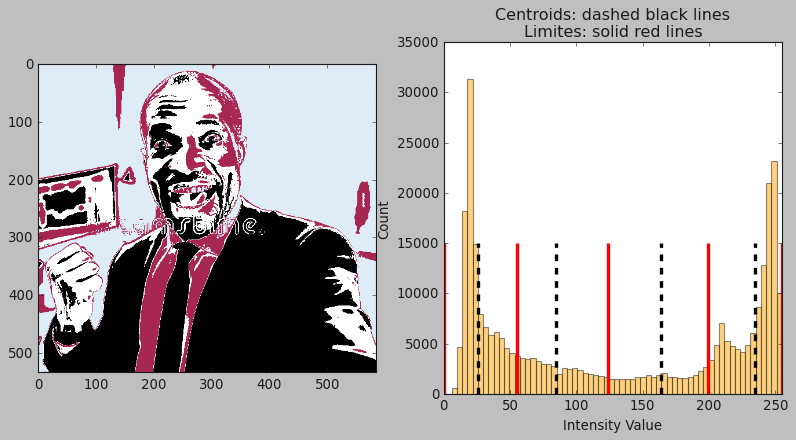

In [7]:
# Experimentos

plt.style.use('classic')

RODADAS_BENCHMARK = 10
MIN_CLUSTERS = 2
MAX_CLUSTERS = 4

ITER_TIMES = [] # DIEGO
ITERATIONS = [] # DIEGO
SIZES = [] # DIEGO

L = 256

lista_full = []

for i in range(nImg):

    stats_per_image = []

    print("\n\nIMAGEM NÚMERO", i+1,":\n\n")

    print("n     K     itTime (Std)     Variabilidade     Iterations (Std)")
    x = ResX[i]
    y = ResY[i]
    N = x*y

    SIZES.append(N) # DIEGO
    
    # vetores em função de K
    Iter_Times = [] # DIEGO
    Iterations = [] # DIEGO

    for K in range(MIN_CLUSTERS, MAX_CLUSTERS + 1):

        ItTime=[]
        Iter=[]

        for bench in range(RODADAS_BENCHMARK):
            IterTime, iterations, classe, centros = kmeans(Images[i], K, ncolors[i], N, 100)

            ItTime.append(IterTime)
            Iter.append(iterations)
        
        Iter_Times.append(np.mean(ItTime))
        Iterations.append(np.mean(Iter))
        
        if np.std(Iter)>0:
            print("INSTABILIDADE NO CÓDIGO -  NUMERO DE ITERAÇÕES DIFERENTES NAS REPETIÇÕES COM K=",K)
        
        image_pk = Image_per_cluster(N, K, np.mean(ItTime), np.std(ItTime)/np.mean(ItTime), np.mean(Iter))
        
        print(N, K, image_pk.t, '(', np.std(ItTime), ')', image_pk.var, image_pk.iterations, '(', np.std(Iter), ')')

        
        stats_per_image.append(image_pk)

        # ordenando centroides das classes de menor para maior
        OrderOf = np.argsort(centros)[0]

        # calculando os limites das classes
        up = []
        dw = []
        for k in range(K):
            clsslst = np.argwhere(np.array(classe) == k)
            clsspxls = Images[i][0][clsslst]
            up.append(np.max(clsspxls))
            dw.append(np.min(clsspxls))
            print("Cluster", k, "limites", dw[-1], ":", up[-1])

        # gerando a mascara com K cores segundo a classificação dos pixels
        Mask = []
        for j in range(N):
            Mask.append(colors.hex2color(my_color[OrderOf[classe[j]]]))

        # PLOT

        fig, ax = plt.subplots(1,2, figsize=(12, 5.5))
        ax[0].imshow(np.array(Mask).reshape(x,y,-1))
        ax[1].hist(np.array(Images[i]).ravel(), bins = 64, color = 'orange', alpha = 0.5)
        ax[1].set_xlim(0, L-1)
        if ncolors[i]>1:
            C = []
            for k in range(K):
                C.append(int(0.2989*centros[0][k]+0.5870*centros[1][k]+0.1140*centros[2][k]))
        else:
            C = centros
        ax[1].vlines(C,0,15000,linestyles='dashed',linewidths=3,colors='black') # centroides
        ax[1].vlines([0]+up,0,15000,linestyles='solid',linewidths=3,colors='red') # limites
        ax[1].set_xlabel('Intensity Value')
        ax[1].set_ylabel('Count')
        ax[1].set_title('Centroids: dashed black lines\nLimites: solid red lines')

        plt.show()

    lista_full.append(stats_per_image)
    
    ITER_TIMES.append(Iter_Times)
    ITERATIONS.append(Iterations)
    

In [8]:
# Calcular a regressão linear
def show_linear_time(n,t):
    slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
    line = slope * np.array(n) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(n, t, label='Pontos')
    plt.plot(n, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'time = {slope:.2g}n + {intercept:.2g}', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('problem size (n)')
    plt.ylabel('time')
    plt.legend()
    
    # Exibir o gráfico
    plt.show()

def show_linear_iter(n,t):
    slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
    line = slope * np.array(n) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(n, t, label='Pontos')
    plt.plot(n, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'iterations = {slope:.2g}n + {intercept:.2g}', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('problem size (n)')
    plt.ylabel('iterations')
    plt.legend()
    
    # Exibir o gráfico
    plt.show()

# 2 CLUSTERS

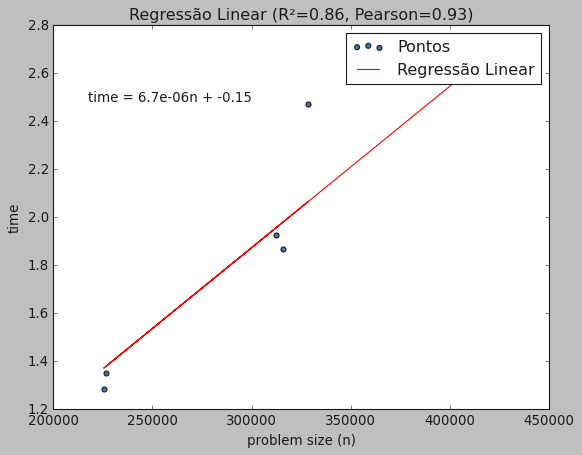

In [9]:
n = [image[0].n for image in lista_full]
t = [image[0].t for image in lista_full]
i = [image[0].iterations for image in lista_full]
show_linear_time(n,t)

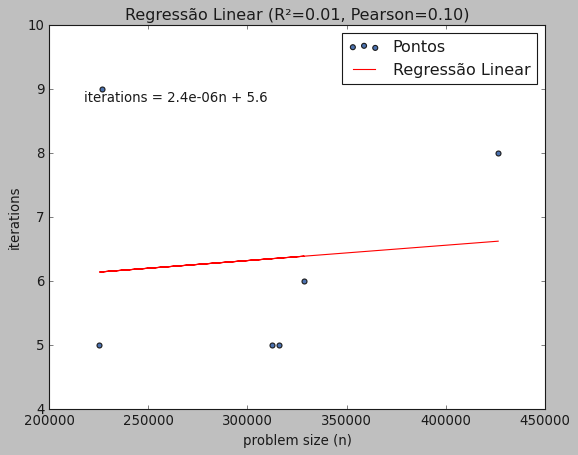

In [10]:
show_linear_iter(n,i)

# 3 CLUSTERS

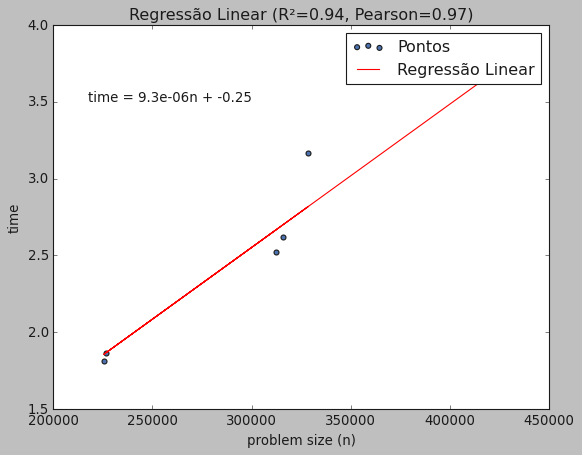

In [11]:
n = [image[1].n for image in lista_full]
t = [image[1].t for image in lista_full]
i = [image[1].iterations for image in lista_full]
show_linear_time(n,t)

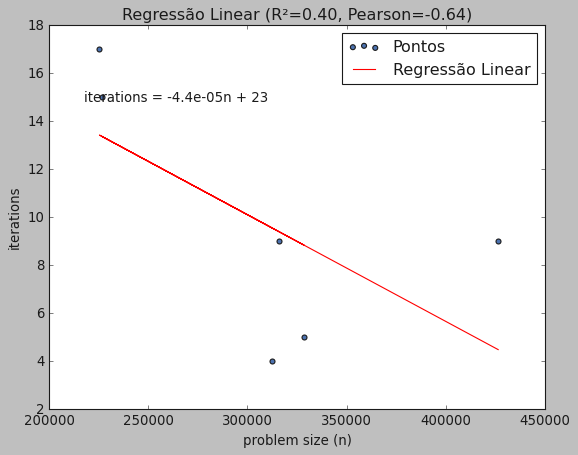

In [12]:
show_linear_iter(n,i)

# 4 CLUSTERS

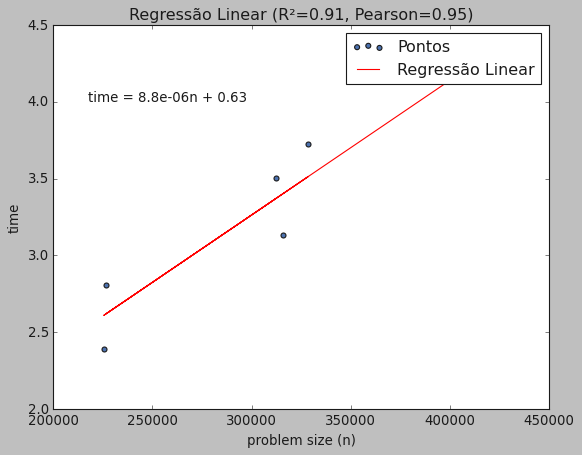

In [13]:
n = [image[2].n for image in lista_full]
t = [image[2].t for image in lista_full]
i = [image[2].iterations for image in lista_full]
show_linear_time(n,t)

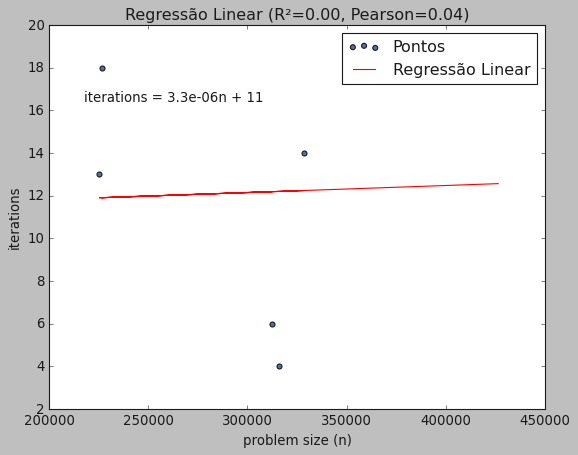

In [14]:
show_linear_iter(n,i)